In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("combined_file.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,_id,id,likes,private,downloads,tags,library_name,createdAt,modelId,pipeline_tag,Date
0,0.0,0,621ffdc136468d709f17f144,pysentimiento/robertuito-sentiment-analysis,47,False,164334147,"['pysentimiento', 'pytorch', 'tf', 'safetensor...",pysentimiento,2022-03-02T23:29:05.000Z,pysentimiento/robertuito-sentiment-analysis,NaN,2024-03-23
1,1.0,1,622fea36174feb5439c2e4be,cardiffnlp/twitter-roberta-base-sentiment-latest,338,False,133072085,"['transformers', 'pytorch', 'tf', 'roberta', '...",transformers,2022-03-15T01:21:58.000Z,cardiffnlp/twitter-roberta-base-sentiment-latest,text-classification,2024-03-23
2,2.0,2,621ffdc136468d709f17cdb3,jonatasgrosman/wav2vec2-large-xlsr-53-english,391,False,57998183,"['transformers', 'pytorch', 'jax', 'safetensor...",transformers,2022-03-02T23:29:05.000Z,jonatasgrosman/wav2vec2-large-xlsr-53-english,automatic-speech-recognition,2024-03-23
3,3.0,3,621ffdc136468d709f17ea63,openai/clip-vit-large-patch14,1027,False,42975164,"['transformers', 'pytorch', 'tf', 'jax', 'safe...",transformers,2022-03-02T23:29:05.000Z,openai/clip-vit-large-patch14,zero-shot-image-classification,2024-03-23
4,4.0,4,621ffdc036468d709f174338,google-bert/bert-base-uncased,1425,False,38322380,"['transformers', 'pytorch', 'tf', 'jax', 'rust...",transformers,2022-03-02T23:29:04.000Z,google-bert/bert-base-uncased,fill-mask,2024-03-23


<AxesSubplot: title={'center': 'Number of Model Uploads Over Time'}>

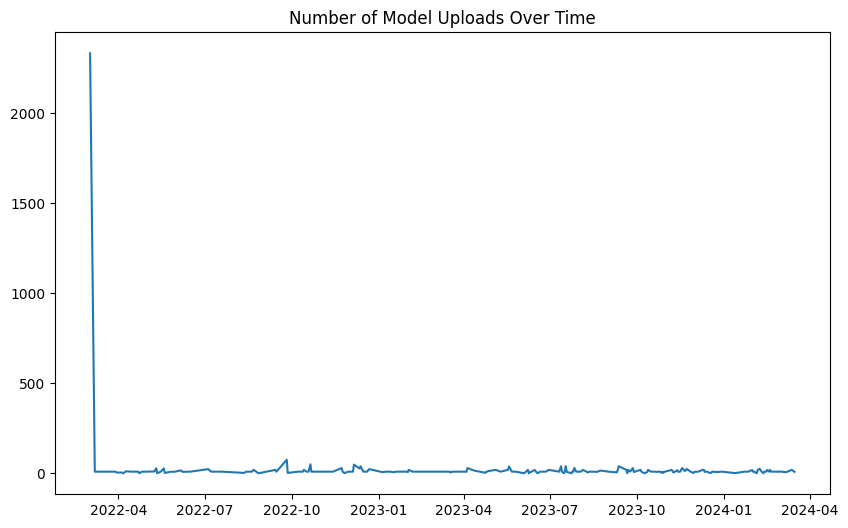

In [3]:
# Convert 'createdAt' to datetime
df['createdAt'] = pd.to_datetime(df['createdAt'])

# Count the number of models created each date
models_per_date = df['createdAt'].dt.date.value_counts().sort_index()

# Display the trend of model uploads over time
models_per_date.plot(kind='line', figsize=(10, 6), title='Number of Model Uploads Over Time')

In [4]:
from collections import Counter

# Combine all tags into a single list
all_tags = []
df['tags'].str.strip("[]").str.replace("'", "").str.split(', ').apply(all_tags.extend)

# Count the occurrences of each tag
tag_counts = Counter(all_tags)

# Get the most common 10 tags
most_common_tags = tag_counts.most_common(10)

# Display the most common tags
most_common_tags

[('region:us', 5000),
 ('has_space', 4430),
 ('pytorch', 4273),
 ('transformers', 4136),
 ('endpoints_compatible', 3986),
 ('safetensors', 2699),
 ('autotrain_compatible', 2398),
 ('en', 2374),
 ('license:apache-2.0', 1814),
 ('tf', 1540)]

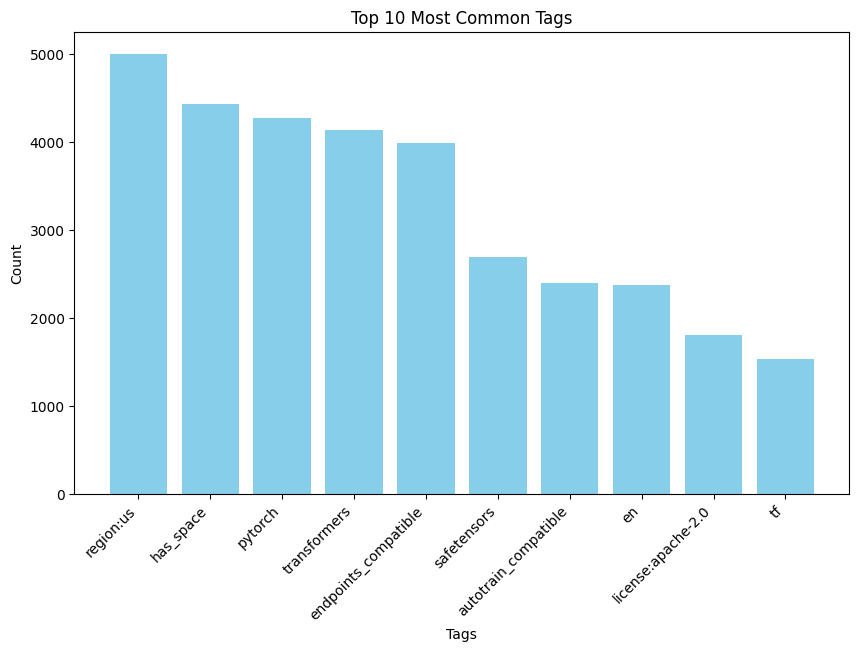

In [5]:
import matplotlib.pyplot as plt
# Convert the most common tags into a DataFrame for visualization
tags_df = pd.DataFrame(most_common_tags, columns=['Tag', 'Count'])

plt.figure(figsize=(10, 6))
plt.bar(tags_df['Tag'], tags_df['Count'], color='skyblue')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.title('Top 10 Most Common Tags')
plt.xticks(rotation=45, ha='right')
plt.show()

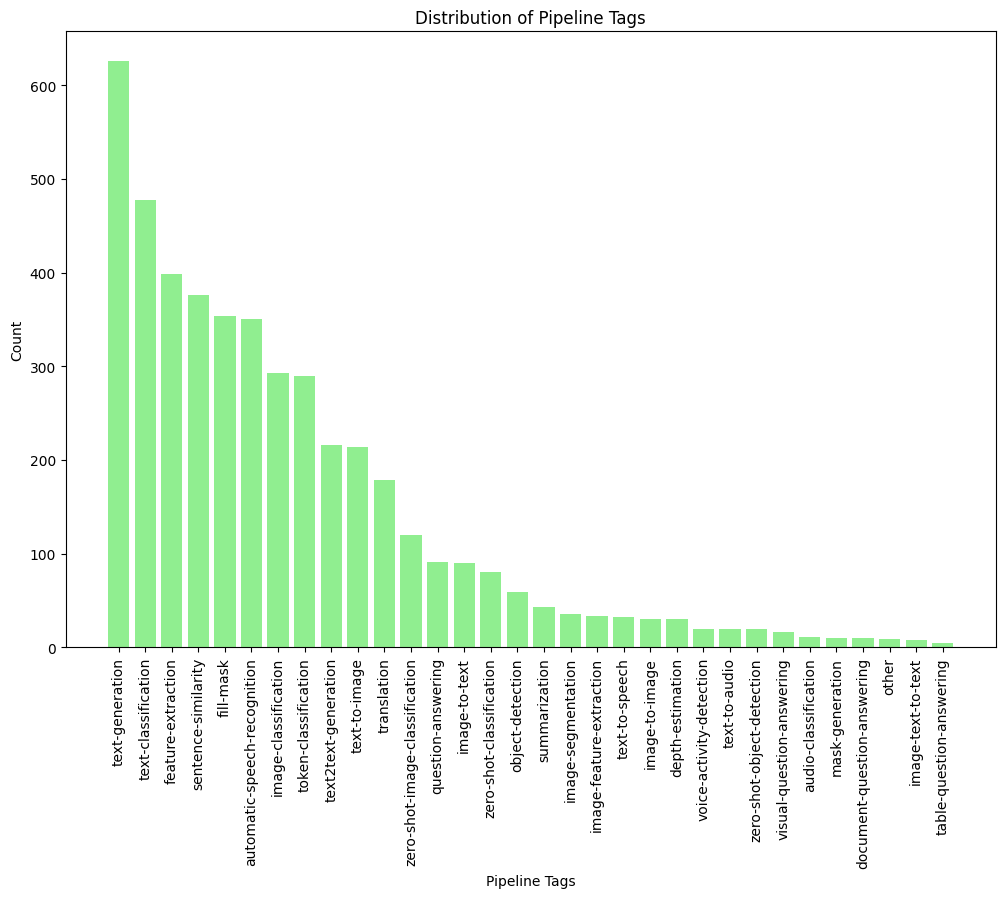

In [6]:
# Prepare data for pipeline_tag distribution visualization
pipeline_tags = df['pipeline_tag'].dropna()  # Drop missing values

# Count the occurrences of each pipeline_tag
pipeline_tag_counts = Counter(pipeline_tags)

# Convert the pipeline_tag counts into a DataFrame for visualization
pipeline_tags_df = pd.DataFrame(pipeline_tag_counts.items(), columns=['Pipeline Tag', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(pipeline_tags_df['Pipeline Tag'], pipeline_tags_df['Count'], color='lightgreen')
plt.xlabel('Pipeline Tags')
plt.ylabel('Count')
plt.title('Distribution of Pipeline Tags')
plt.xticks(rotation=90)
plt.show()

In [7]:
# Count the occurrences of each library_name
library_counts = df['library_name'].value_counts()

# Get the top 5 most used libraries
top_libraries = library_counts.head(5)

top_libraries

transformers             3809
sentence-transformers     500
diffusers                 308
timm                      119
pyannote-audio             72
Name: library_name, dtype: int64

In [8]:
# Group by 'Date' and get the top 5 models based on downloads for each date
top_downloads_by_date = df.groupby('Date').apply(lambda x: x.nlargest(5, 'downloads'))

# Reset index to make the dataframe more readable
top_downloads_by_date.reset_index(drop=True, inplace=True)

top_downloads_by_date[['Date', 'id', 'downloads']]

,Date,id,downloads
0,2024-03-23,pysentimiento/robertuito-sentiment-analysis,164334147
1,2024-03-23,cardiffnlp/twitter-roberta-base-sentiment-latest,133072085
2,2024-03-23,jonatasgrosman/wav2vec2-large-xlsr-53-english,57998183
3,2024-03-23,openai/clip-vit-large-patch14,42975164
4,2024-03-23,google-bert/bert-base-uncased,38322380
5,2024-03-29,pysentimiento/robertuito-sentiment-analysis,164331337
6,2024-03-29,cardiffnlp/twitter-roberta-base-sentiment-latest,132942887
7,2024-03-29,jonatasgrosman/wav2vec2-large-xlsr-53-english,57441994
8,2024-03-29,openai/clip-vit-large-patch14,47173234
9,2024-03-29,google-bert/bert-base-uncased,40628729


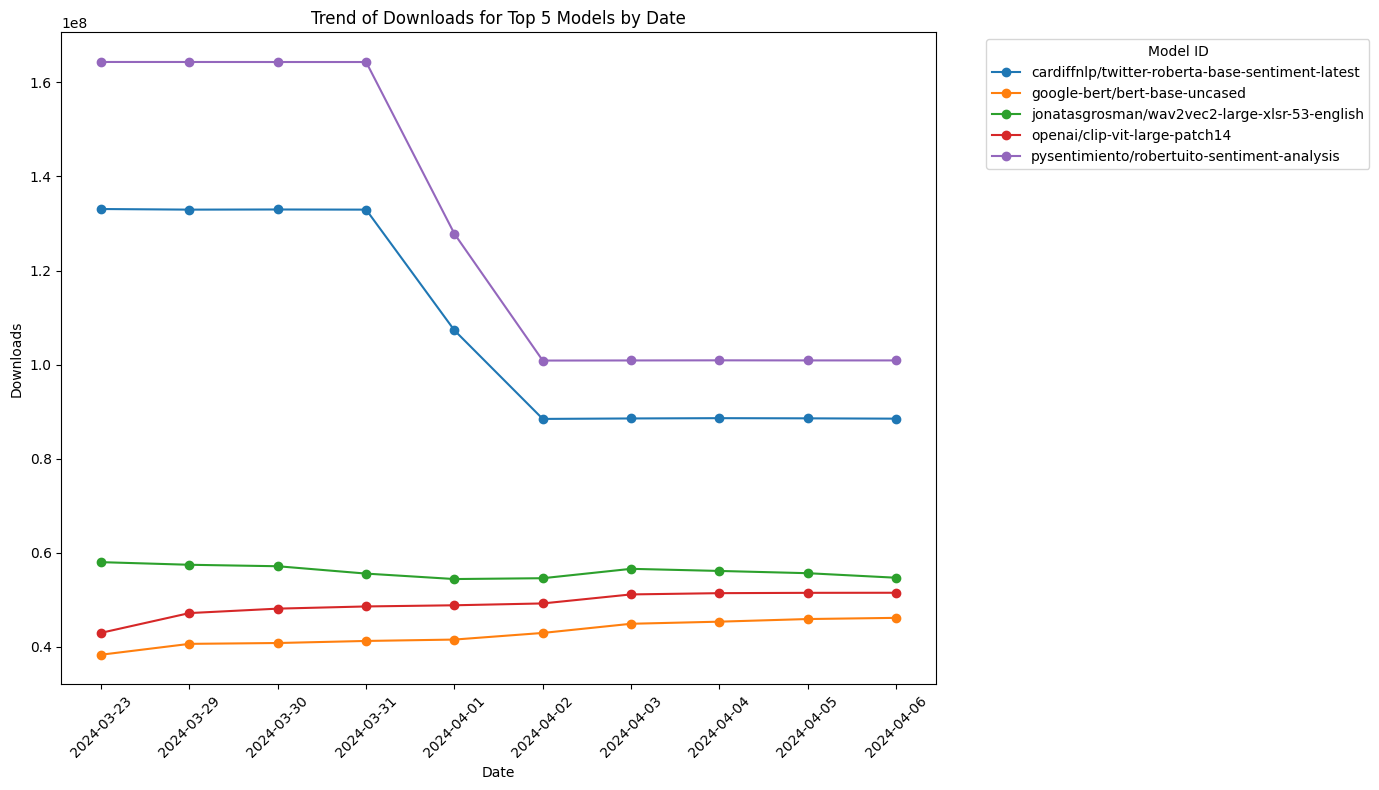

In [9]:
import matplotlib.pyplot as plt

# Prepare data for plotting: Extract top 5 models based on downloads for each date
plot_data = top_downloads_by_date.pivot(index='Date', columns='id', values='downloads')

plt.figure(figsize=(14, 8))
for column in plot_data.columns:
    plt.plot(plot_data.index, plot_data[column], marker='o', label=column)

plt.title('Trend of Downloads for Top 5 Models by Date')
plt.xlabel('Date')
plt.ylabel('Downloads')
plt.xticks(rotation=45)
plt.legend(title='Model ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

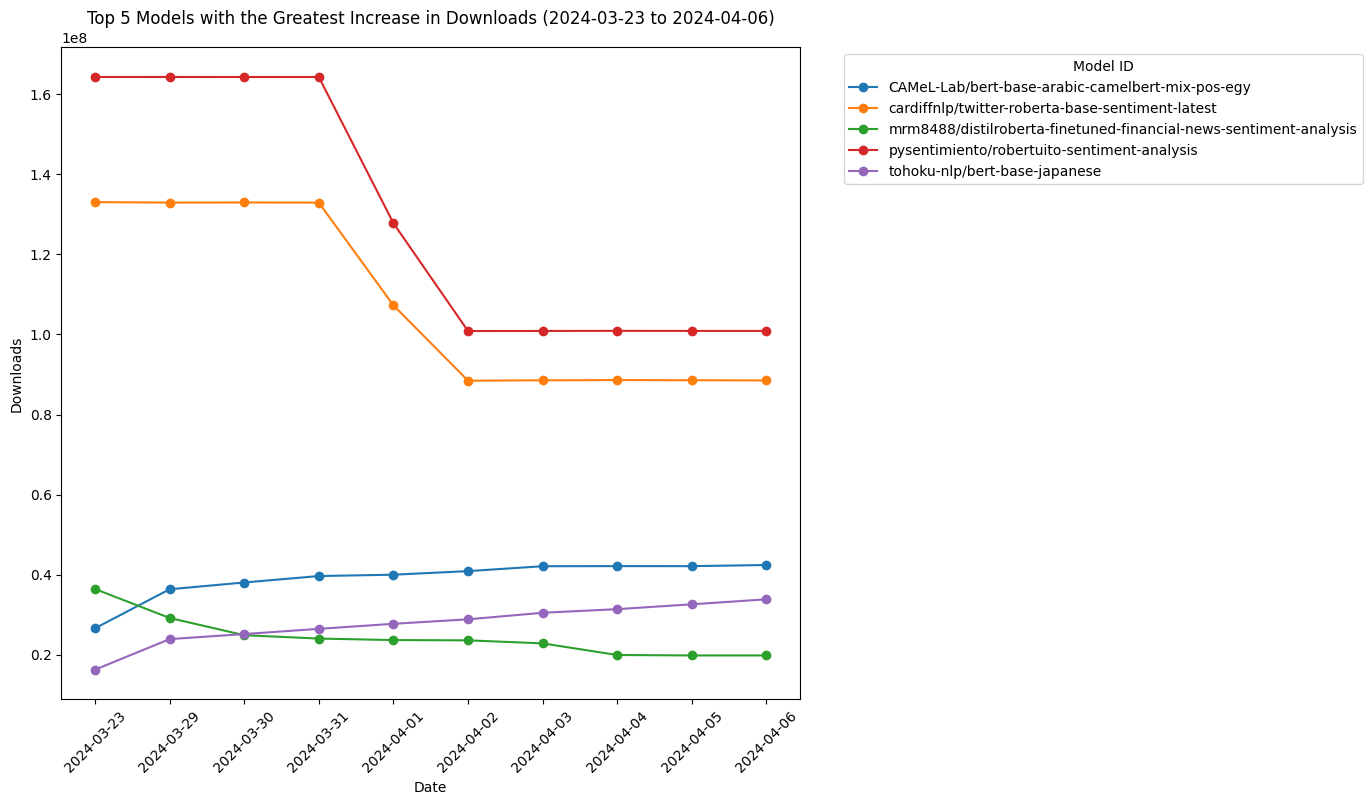

In [10]:
# Filter the dataset for the specified date range
date_range_data = df[(df['Date'] >= '2024-03-23') & (df['Date'] <= '2024-04-06')]

# Group by model ID and calculate the difference in downloads between the max and min dates
download_diff = date_range_data.groupby('id').apply(lambda x: x['downloads'].max() - x['downloads'].min())

# Sort the differences and get the top 5 models with the greatest increase in downloads
top_5_increases = download_diff.sort_values(ascending=False).head(5)

plot_data = date_range_data[date_range_data['id'].isin(top_5_increases.index)]
plot_data = plot_data.pivot_table(index='Date', columns='id', values='downloads', aggfunc='max')

plt.figure(figsize=(14, 8))
for column in plot_data.columns:
    plt.plot(plot_data.index, plot_data[column], marker='o', label=column)

plt.title('Top 5 Models with the Greatest Increase in Downloads (2024-03-23 to 2024-04-06)')
plt.xlabel('Date')
plt.ylabel('Downloads')
plt.xticks(rotation=45)
plt.legend(title='Model ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Linar Regression

C:\Users\admin\AppData\Local\Temp\ipykernel_11988\4192499530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Date_ordinal'] = pd.to_datetime(model_data['Date']).apply(lambda date: date.toordinal())
D:\python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


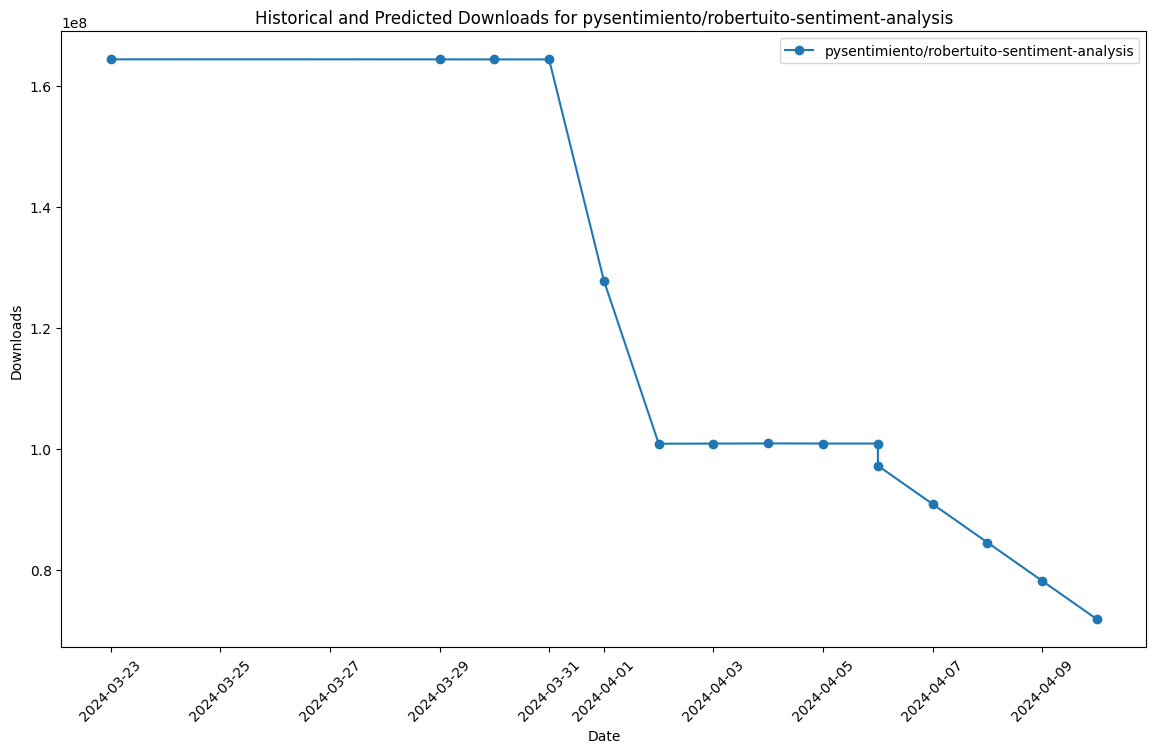

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime
# Get the overall top 5 models based on total downloads
overall_top_5 = df.groupby('id')['downloads'].max().sort_values(ascending=False).head(5).index

# Prepare data for a linear regression model for one of the top models
model_id = overall_top_5[0]  # Select the top model for demonstration
model_data = df[df['id'] == model_id]

model_data['Date_ordinal'] = pd.to_datetime(model_data['Date']).apply(lambda date: date.toordinal())

# Initialize and fit the linear regression model again
reg = LinearRegression().fit(model_data[['Date_ordinal']], model_data['downloads'])

# Predicting future downloads with corrected dates
future_dates = pd.date_range(start=model_data['Date'].max(), periods=5, freq='D')
future_dates_ordinal = future_dates.map(lambda date: datetime.toordinal(date)).to_numpy().reshape(-1, 1)
future_predictions = reg.predict(future_dates_ordinal)

future_df = pd.DataFrame({'Date': future_dates, 'downloads': future_predictions, 'id': [model_id]*5})
combined_data = pd.concat([model_data[['Date', 'downloads', 'id']], future_df])

combined_data['Date'] = pd.to_datetime(combined_data['Date'])

plt.figure(figsize=(14, 8))
plt.plot(combined_data['Date'], combined_data['downloads'], marker='o', label=model_id)
plt.title(f'Historical and Predicted Downloads for {model_id}')
plt.xlabel('Date')
plt.ylabel('Downloads')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## RMSE

In [12]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

df = pd.read_csv("combined_file.csv")

# Step 1: 基于下载总量获取前5个模型的ID
overall_top_5 = df.groupby('id')['downloads'].sum().sort_values(ascending=False).head(5).index.tolist()

# 初始化LOO交叉验证器
loo = LeaveOneOut()

# 用于存储每个模型的RMSE的字典
model_errors = {}

# Step 2: 循环遍历每个顶尖模型进行LOO交叉验证
for model_id in overall_top_5:
    # 过滤出当前模型的数据
    model_data = df[df['id'] == model_id]

    # 检查是否有数据，如果没有，则跳过
    if model_data.empty:
        print(f"Model {model_id} has no data. Skipping...")
        continue

    # 将'Date'转换为datetime格式，并确保'downloads'是数值型
    model_data['Date'] = pd.to_datetime(model_data['Date'], errors='coerce')
    model_data['downloads'] = pd.to_numeric(model_data['downloads'], errors='coerce')
    model_data['Date_ordinal'] = model_data['Date'].apply(lambda x: x.toordinal())

    # 定义特征和目标变量
    X = model_data[['Date_ordinal']]
    y = model_data['downloads']

    # 存储个别预测错误
    errors = []

    # 执行Leave-One-Out交叉验证
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # 初始化并拟合线性回归模型
        model = LinearRegression().fit(X_train, y_train)

        # 在测试集上预测
        y_pred = model.predict(X_test)

        # 计算并存储误差
        error = mean_squared_error(y_test, y_pred, squared=False)  # 计算RMSE
        errors.append(error)

    # 计算当前模型的整体RMSE并存储
    model_errors[model_id] = np.mean(errors)

# 显示每个顶尖模型的RMSE
print("RMSE for each top model:")
for model_id, rmse in model_errors.items():
    print(f"Model ID {model_id}: RMSE = {rmse}")

RMSE for each top model:
Model ID pysentimiento/robertuito-sentiment-analysis: RMSE = 20060906.873339843
Model ID cardiffnlp/twitter-roberta-base-sentiment-latest: RMSE = 14023009.899658203
Model ID jonatasgrosman/wav2vec2-large-xlsr-53-english: RMSE = 879200.6468200684
Model ID openai/clip-vit-large-patch14: RMSE = 491934.95577392576
Model ID google-bert/bert-base-uncased: RMSE = 1024610.4136535644


C:\Users\admin\AppData\Local\Temp\ipykernel_11988\4202658023.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Date'] = pd.to_datetime(model_data['Date'], errors='coerce')
C:\Users\admin\AppData\Local\Temp\ipykernel_11988\4202658023.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['downloads'] = pd.to_numeric(model_data['downloads'], errors='coerce')
C:\Users\admin\AppData\Local\Temp\ipykernel_11988\4202658023.py:31: SettingWithCopyWarning: 
A value is trying to be set on a cop

### This RMSE is related to data amount, my current data is not enough

## Save the model

In [13]:
from joblib import dump, load
dump(model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

<ipython-input-18-8530813c4540>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Date_ordinal'] = pd.to_datetime(model_data['Date']).apply(lambda date: date.toordinal())
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-18-8530813c4540>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Date_ordinal'] = pd.to_datetime(model_data['Date']).apply(

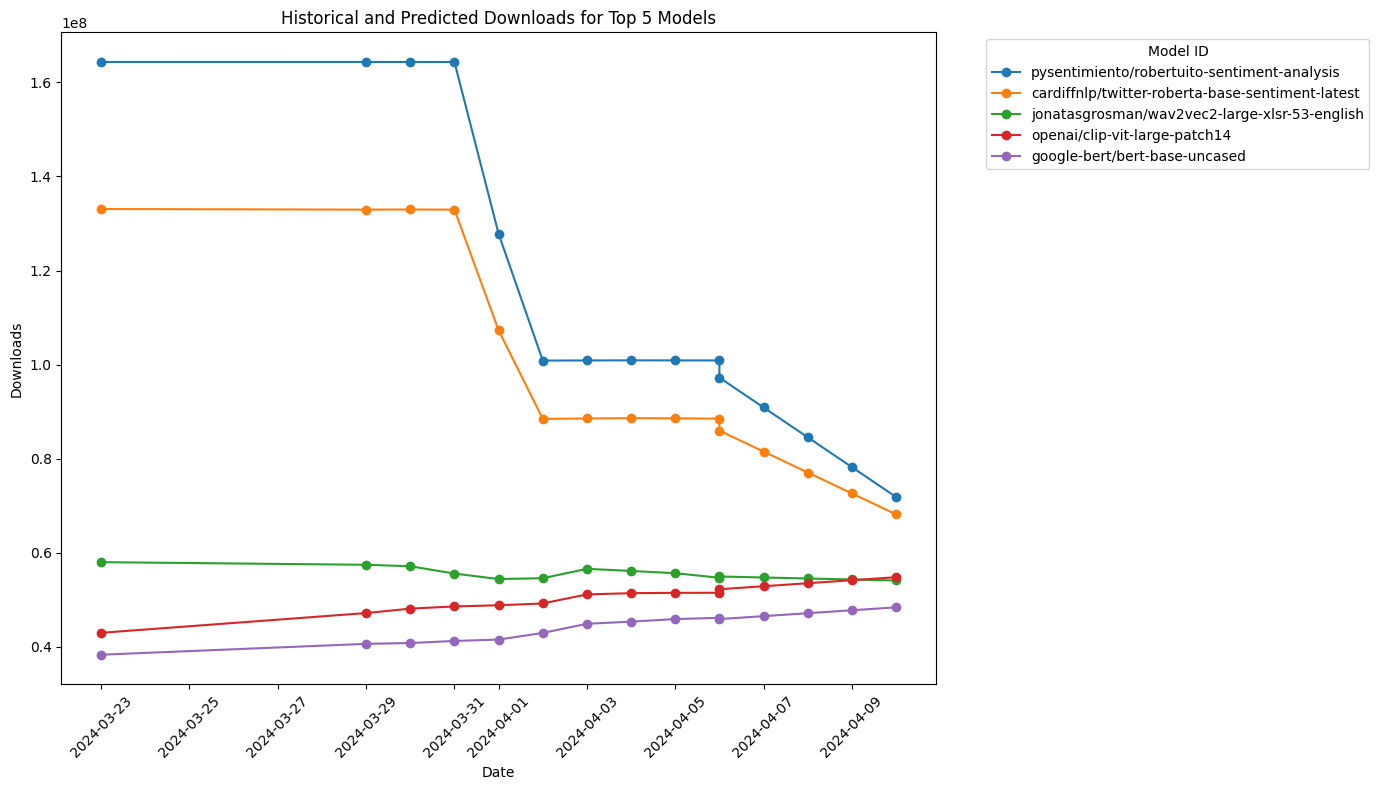

In [18]:
# Initialize a figure for plotting
plt.figure(figsize=(14, 8))

for model_id in overall_top_5:
    # Prepare data for this model
    model_data = df[df['id'] == model_id]
    model_data['Date_ordinal'] = pd.to_datetime(model_data['Date']).apply(lambda date: date.toordinal())

    # Linear regression model
    X = model_data[['Date_ordinal']]
    y = model_data['downloads']
    reg = LinearRegression().fit(X, y)

    # Prepare future dates for prediction
    future_dates = pd.date_range(start=model_data['Date'].max(), periods=5, freq='D')
    future_dates_ordinal = future_dates.map(lambda date: datetime.toordinal(date)).to_numpy().reshape(-1, 1)
    future_predictions = reg.predict(future_dates_ordinal)

    future_df = pd.DataFrame({'Date': future_dates, 'downloads': future_predictions, 'id': [model_id]*5})
    combined_data = pd.concat([model_data[['Date', 'downloads', 'id']], future_df])
    combined_data['Date'] = pd.to_datetime(combined_data['Date'])

    plt.plot(combined_data['Date'], combined_data['downloads'], marker='o', label=model_id)

plt.title('Historical and Predicted Downloads for Top 5 Models')
plt.xlabel('Date')
plt.ylabel('Downloads')
plt.xticks(rotation=45)
plt.legend(title='Model ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Time senquece

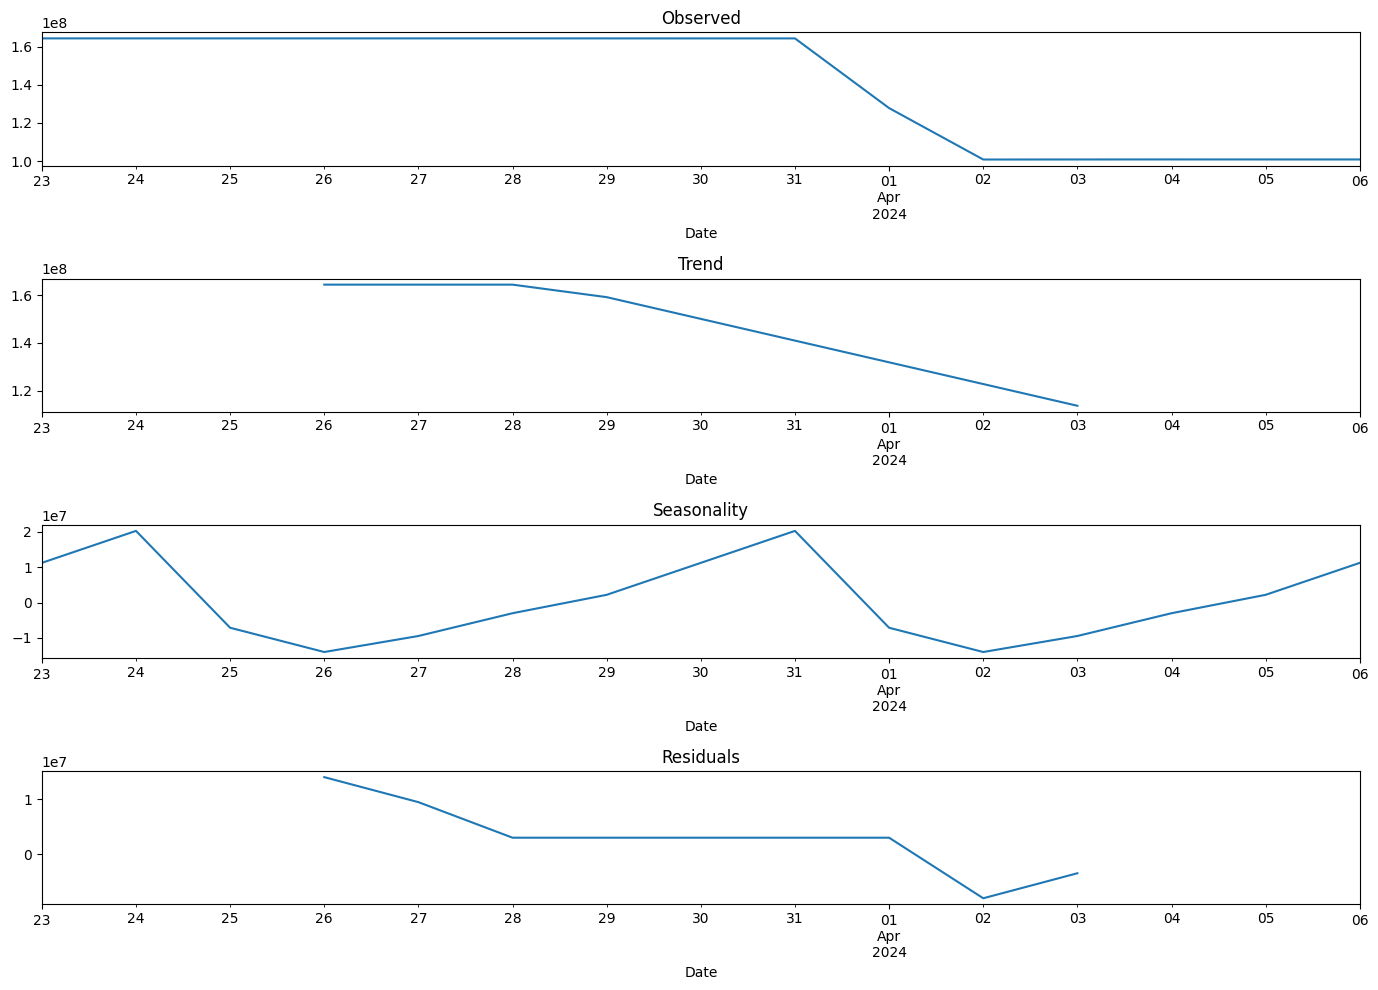

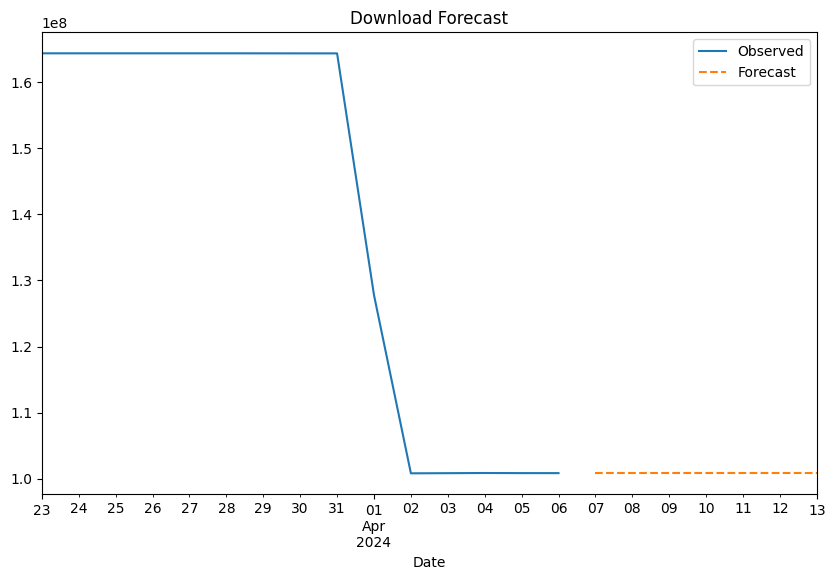

2024-04-07    1.008842e+08
2024-04-08    1.008842e+08
2024-04-09    1.008842e+08
2024-04-10    1.008842e+08
2024-04-11    1.008842e+08
2024-04-12    1.008842e+08
2024-04-13    1.008842e+08
Freq: D, Name: predicted_mean, dtype: float64

In [24]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

data = pd.read_csv("combined_file.csv")

# 确保 'Date' 列是日期时间格式
data['Date'] = pd.to_datetime(data['Date'])

# 筛选特定模型的数据
model_data = data[data['id'] == "pysentimiento/robertuito-sentiment-analysis"].sort_values(by='Date')

# 将 'Date' 列设置为索引，并填充缺失的日期
model_data = model_data.set_index('Date')
model_data = model_data.asfreq('D', method='pad')['downloads']

# Decompose the time series to analyze its components
decomposition = seasonal_decompose(model_data, model='additive')

# Plot the decomposed time series
fig, ax = plt.subplots(4, 1, figsize=(14, 10))
decomposition.observed.plot(ax=ax[0], legend=False, title='Observed')
decomposition.trend.plot(ax=ax[1], legend=False, title='Trend')
decomposition.seasonal.plot(ax=ax[2], legend=False, title='Seasonality')
decomposition.resid.plot(ax=ax[3], legend=False, title='Residuals')
plt.tight_layout()

# Since the dataset covers a limited range of dates, we proceed with caution for ARIMA modeling
# Determine p, d, q parameters for ARIMA model (simplified approach due to limited data scope)
p = 1  # Based on autocorrelation
d = 1  # Assuming non-stationary data that needs differencing
q = 1  # Based on partial autocorrelation

# Fit ARIMA model
arima_model = ARIMA(model_data, order=(p, d, q))
arima_result = arima_model.fit()

# Forecast the next 7 days as an example
forecast = arima_result.forecast(steps=7)

# Plot the forecast
plt.figure(figsize=(10, 6))
model_data.plot(label='Observed', legend=True)
forecast.plot(label='Forecast', legend=True, linestyle='--')
plt.title('Download Forecast')
plt.show()

forecast